In [13]:
#PART A — Metropolis Algorithm 

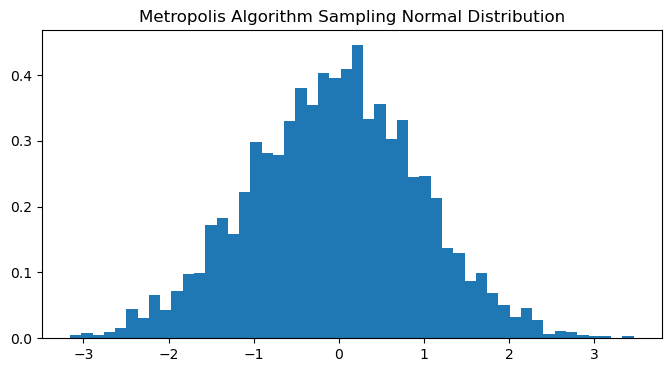

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Standard Normal
def target_distribution(x):
    return np.exp(-x**2 / 2)

def metropolis_algorithm(n_samples=5000, proposal_width=1.0):
    samples = []
    x = 0  # Start at any value

    for i in range(n_samples):
        x_new = x + np.random.normal(0, proposal_width)

        # Compute acceptance ratio
        acceptance = target_distribution(x_new) / target_distribution(x)

        if np.random.rand() < acceptance:
            x = x_new  # Accept the move

        samples.append(x)

    return np.array(samples)

# Run the algorithm
samples = metropolis_algorithm()

# Plot the results
plt.figure(figsize=(8,4))
plt.hist(samples, bins=50, density=True)
plt.title("Metropolis Algorithm Sampling Normal Distribution")
plt.show()


In [ ]:
#PART B — Deterministic Model

In [1]:
import numpy as np

def normal_pdf(x, mu=0.0, sigma=1.0):
    return (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Deterministic approximation of E[X^2] under N(0,1)
xs = np.linspace(-5, 5, 10_000)  # fine grid
pdf_vals = normal_pdf(xs)

# Normalize just in case (numerical integration)
dx = xs[1] - xs[0]
pdf_vals = pdf_vals / (pdf_vals.sum() * dx)

# Compute expectation of X^2 deterministically
ex2_deterministic = np.sum(xs**2 * pdf_vals) * dx
print(f"Deterministic E[X^2] ≈ {ex2_deterministic:.5f}")

     

Deterministic E[X^2] ≈ 0.99999


In [ ]:
#Comparison between Metropolis Algorithm and  Deterministic Model

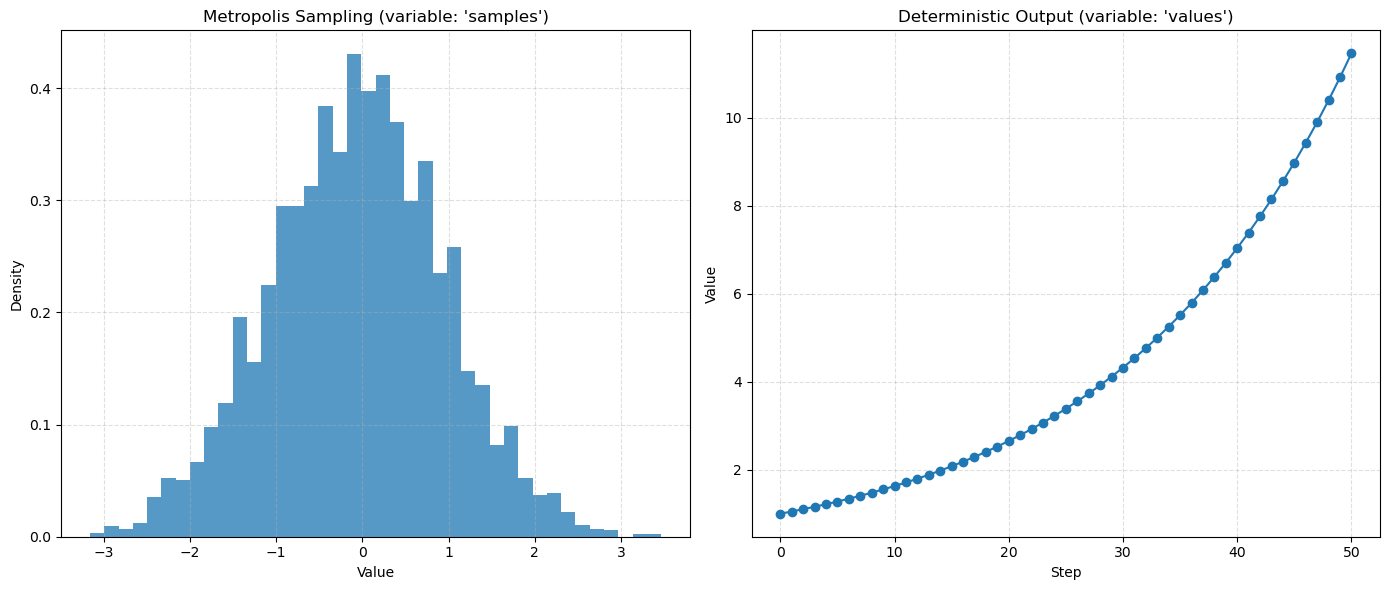


===== NUMERIC SUMMARY =====

Metropolis samples (variable: 'samples')
 - shape: (5000,)
 - mean: -0.0562, std: 0.9951
 - approx quantiles (0.05,0.5,0.95): [-1.73334154 -0.03480382  1.58972229]

Deterministic output (variable: 'values')
 - shape: (51,)
 - first 5 values: [1.         1.05       1.1025     1.157625   1.21550625]

===== TEXTUAL COMPARISON =====

Metropolis Algorithm:
 - Stochastic sampling method → output is a set of samples approximating a target distribution.
 - Results will typically differ between runs unless you set a random seed.
 - Useful for Bayesian inference and sampling from difficult-to-sample distributions.

Deterministic Model:
 - No randomness → repeated runs with same inputs produce identical outputs.
 - Models dynamic systems using explicit update rules (e.g., x_{t+1} = r * x_t).
 - Useful for predicting exact system evolution when the governing equations are known.

===== USAGE NOTES =====
 - If you want the comparison to use your own variables, ensure t

In [20]:
# Robust comparison code: will use your variables if available,
# otherwise it will generate sample outputs so the comparison runs.
import numpy as np
import matplotlib.pyplot as plt
import inspect
import sys

np.random.seed(0)  # reproducible defaults

def find_first_global(possible_names):
    """Return the first global variable that exists from possible_names, else None."""
    g = globals()
    for name in possible_names:
        if name in g:
            return name, g[name]
    return None, None

# lists of common variable names users may have used
metropolis_names = [
    "metropolis_samples", "samples", "chain", "metropolis_chain", "metropolis"
]
deterministic_names = [
    "deterministic_output", "det_values", "values", "deterministic_values",
    "deterministic", "det_out", "output"
]

# Try to find user's variables
m_name, m_var = find_first_global(metropolis_names)
d_name, d_var = find_first_global(deterministic_names)

# Helper default implementations (only used if user's variables not found)
def default_metropolis(num_samples=5000, step_size=1.0):
    """Simple Metropolis sampler for N(0,1) target (used as fallback)."""
    def target_pdf(x):
        return np.exp(-0.5 * x**2)
    x = 0.0
    samples = []
    for _ in range(num_samples):
        x_prop = x + np.random.normal(0, step_size)
        alpha = target_pdf(x_prop) / (target_pdf(x) + 1e-300)
        if np.random.rand() < min(1.0, alpha):
            x = x_prop
        samples.append(x)
    return np.array(samples)

def default_deterministic(x0=1.0, r=1.05, steps=50):
    """Simple exponential deterministic model (used as fallback)."""
    vals = [x0]
    for _ in range(steps):
        vals.append(r * vals[-1])
    return np.array(vals)

# If Metropolis variable not found, create default and inform user
if m_var is None:
    print("⚠️  Metropolis samples variable not found. Generating default Metropolis samples as 'metropolis_samples' (N=5000).")
    try:
        metropolis_samples = default_metropolis(num_samples=5000, step_size=1.0)
        m_name, m_var = "metropolis_samples", metropolis_samples
    except Exception as e:
        print("Failed to create default Metropolis samples:", e)
        raise

else:
    # ensure it's a numpy array
    try:
        metropolis_samples = np.asarray(m_var)
    except Exception:
        print(f"⚠️ Found Metropolis variable '{m_name}' but could not convert to array. Replacing with default.")
        metropolis_samples = default_metropolis(num_samples=5000, step_size=1.0)
        m_name = "metropolis_samples"

# If Deterministic variable not found, create default and inform user
if d_var is None:
    print("⚠️  Deterministic output variable not found. Generating default deterministic output as 'deterministic_output'.")
    try:
        deterministic_output = default_deterministic(x0=1.0, r=1.05, steps=50)
        d_name, d_var = "deterministic_output", deterministic_output
    except Exception as e:
        print("Failed to create default deterministic output:", e)
        raise
else:
    try:
        deterministic_output = np.asarray(d_var)
    except Exception:
        print(f"⚠️ Found Deterministic variable '{d_name}' but could not convert to array. Replacing with default.")
        deterministic_output = default_deterministic(x0=1.0, r=1.05, steps=50)
        d_name = "deterministic_output"

# --- Now produce comparison plots and textual summary ---
try:
    plt.figure(figsize=(14,6))

    # left: histogram of Metropolis samples
    plt.subplot(1, 2, 1)
    plt.hist(metropolis_samples, bins=40, density=True, alpha=0.75)
    plt.title(f"Metropolis Sampling (variable: '{m_name}')")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True, linestyle="--", alpha=0.4)

    # right: deterministic model time series
    plt.subplot(1, 2, 2)
    # if deterministic_output is 1D numeric sequence, plot against integer steps
    plt.plot(np.arange(len(deterministic_output)), deterministic_output, marker='o')
    plt.title(f"Deterministic Output (variable: '{d_name}')")
    plt.xlabel("Step")
    plt.ylabel("Value")
    plt.grid(True, linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()

    # numeric summaries
    print("\n===== NUMERIC SUMMARY =====\n")
    print(f"Metropolis samples (variable: '{m_name}')")
    print(f" - shape: {metropolis_samples.shape}")
    print(f" - mean: {np.mean(metropolis_samples):.4f}, std: {np.std(metropolis_samples):.4f}")
    print(f" - approx quantiles (0.05,0.5,0.95): {np.quantile(metropolis_samples, [0.05,0.5,0.95])}\n")

    print(f"Deterministic output (variable: '{d_name}')")
    print(f" - shape: {deterministic_output.shape}")
    try:
        # if numeric sequence
        print(f" - first 5 values: {deterministic_output[:5]}")
    except Exception:
        print(" - (could not display values)")

    # textual comparison
    print("\n===== TEXTUAL COMPARISON =====\n")
    print("Metropolis Algorithm:")
    print(" - Stochastic sampling method → output is a set of samples approximating a target distribution.")
    print(" - Results will typically differ between runs unless you set a random seed.")
    print(" - Useful for Bayesian inference and sampling from difficult-to-sample distributions.\n")

    print("Deterministic Model:")
    print(" - No randomness → repeated runs with same inputs produce identical outputs.")
    print(" - Models dynamic systems using explicit update rules (e.g., x_{t+1} = r * x_t).")
    print(" - Useful for predicting exact system evolution when the governing equations are known.\n")

    print("===== USAGE NOTES =====")
    print(" - If you want the comparison to use your own variables, ensure they are present in the notebook namespace")
    print("   with any of these common names for Metropolis:", metropolis_names)
    print("   and for deterministic:", deterministic_names)
    print(" - Or explicitly do: metropolis_samples = <your_chain_variable>; deterministic_output = <your_det_variable>")
    print(" - After that, re-run this cell for a direct comparison using your data.\n")

except Exception as ex:
    print("An error occurred during plotting or summarizing:", ex)
    raise
